### Word Cloud

In [1]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

- Stopwords

In [2]:
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [3]:
# WordCloud에서 제공하는 불용어
sw_wc = STOPWORDS
print(sw_wc)

{'myself', 'or', 'and', 'few', "when's", 'whom', 'too', 'yourselves', 'its', 'there', 'through', 'which', "we'd", 'otherwise', 'hence', "that's", 'when', "doesn't", 'yours', 'in', 'during', 'be', 'under', 'more', 'up', 'after', 'theirs', "there's", 'shall', 'have', "we're", "he'd", "who's", 'who', 'such', "i've", 'are', 'before', 'for', "you've", 'herself', 'both', 'yourself', 'been', 'themselves', 'cannot', "he'll", "where's", 'how', 'ourselves', 'the', 'having', 'to', 'same', 'himself', 'his', 'is', 'then', "we'll", 'other', 'had', "they'll", 'out', 'ours', "don't", 'could', 'of', 'further', "she'd", 'since', "they'd", 'if', 'were', 'what', 'should', 'else', 'with', 'they', 'does', 'just', 'on', "isn't", "they're", 'ever', 'most', 'each', 'but', 'all', "hasn't", 'a', "wasn't", 'those', "weren't", 'below', "why's", 'doing', 'my', 'however', 'our', 'therefore', 'am', 'com', 'hers', "he's", 'http', "she'll", "she's", 'so', 'until', 'by', "hadn't", 'over', 'them', 'you', 'he', 'like', "h

In [4]:
len(sw_nltk), len(sw_wc)

(179, 192)

- Alice in Wonderland

In [5]:
with open('data/Alice.txt') as f:
    text = f.read()

In [6]:
# 불용어에 'said' 추가
sw_wc.add('said')

In [7]:
wc = WordCloud(background_color='white', max_words=2000,
               stopwords=sw_wc).generate(text)

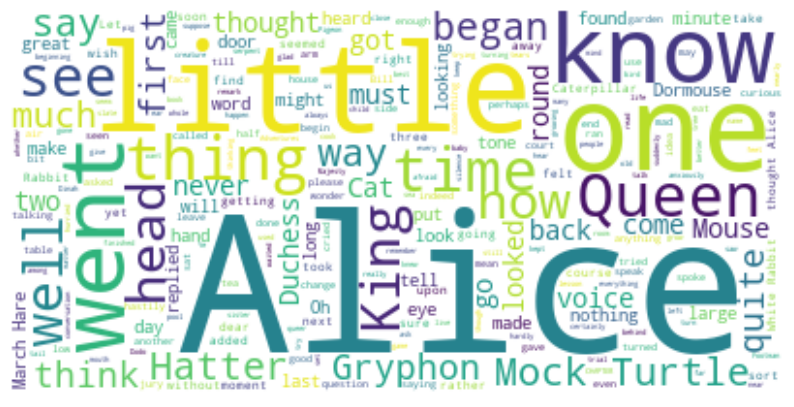

In [12]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

In [10]:
# 사용빈도 Top 10
count = 0
for key, val in wc.words_.items():
    print(f'{key}:\t{val}')
    count += 1
    if count >= 10:
        break

Alice:	1.0
little:	0.29508196721311475
one:	0.27595628415300544
know:	0.2459016393442623
went:	0.226775956284153
thing:	0.2185792349726776
time:	0.2103825136612022
Queen:	0.20765027322404372
see:	0.1830601092896175
King:	0.17486338797814208


- 배경 그림위에 표시하기

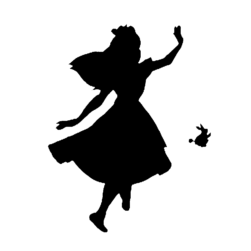

In [19]:
mask = np.array(Image.open('data/Alice_mask.png'))
plt.figure(figsize=(5,3))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off');

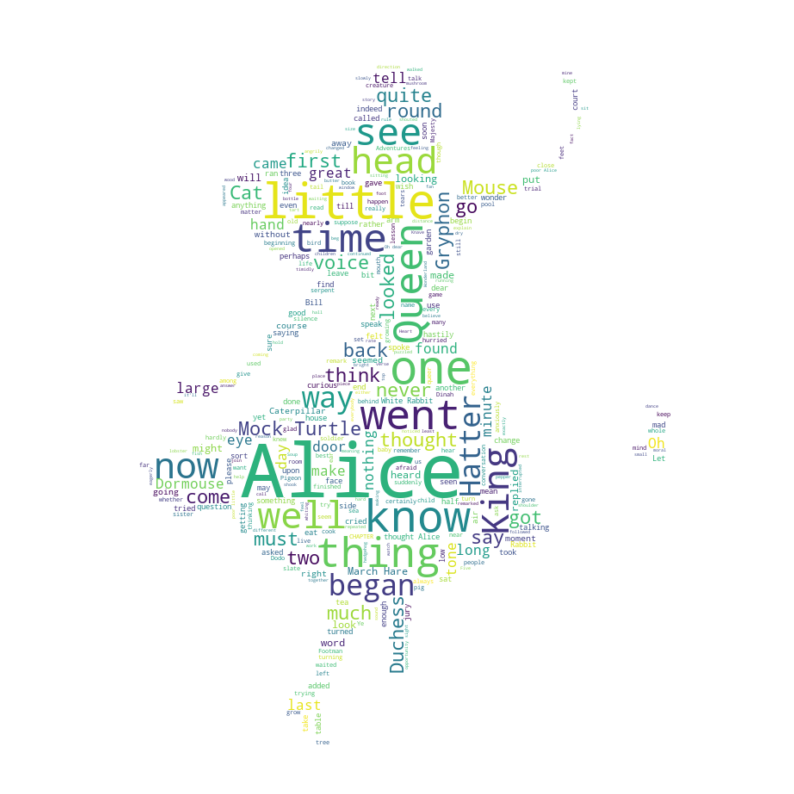

In [14]:
wc = WordCloud(background_color='white', max_words=2000,
               stopwords=sw_wc, mask=mask).generate(text)
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

- Star Wars

In [16]:
with open('data/A_new_hope.txt') as f:
    text = f.read()
text = text.replace('HAN', 'Han').replace("LUKE'S", 'Luke')

In [17]:
sw = STOPWORDS
sw.add('int')
sw.add('ext')
len(sw)

195

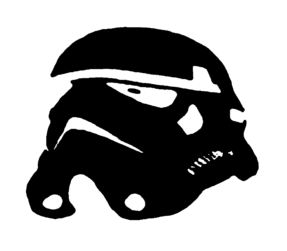

In [20]:
mask = np.array(Image.open('data/Stormtrooper_mask.png'))
plt.figure(figsize=(5,3))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off');

In [21]:
wc = WordCloud(mask=mask, max_words=1000,stopwords=sw_wc,
               margin=10, random_state=2023).generate(text)
defalt_color = wc.to_array

In [22]:
# HSL : Hue, Saturation(채도), Lightness(명도)
def grey_color(word, font_size, position, orientation, random_state, **kwargs):
    return f'hsl(0, 0%, {np.random.randint(60,101)}%)'

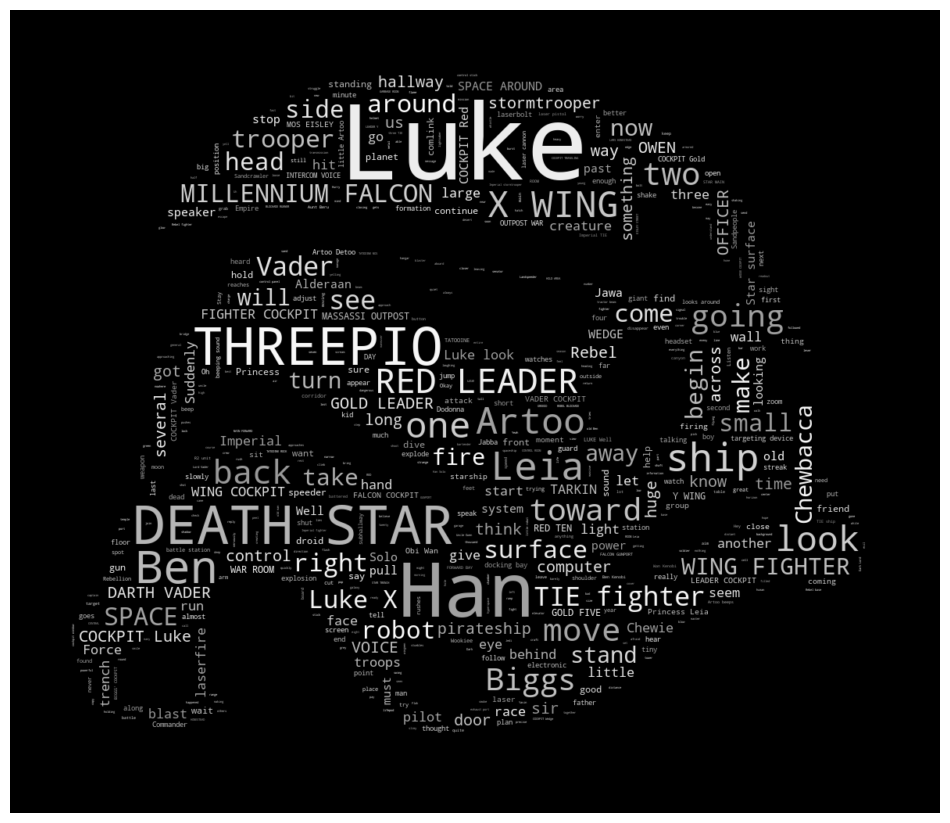

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2023),
                      interpolation='bilinear')
plt.axis('off');